<a href="https://colab.research.google.com/github/Ghalia671/MODULE1/blob/master/Ghalia_3_2_GNB_LDA_QDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Données linéaires

## Données simulées

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=20, centers=2, n_features=1,
                  random_state=0)

In [5]:
n_samples=20

X=np.concatenate((np.random.normal(loc=2, scale=1.0, size=n_samples),
                  np.random.normal(loc=5.0, scale=1.0, size=n_samples))).reshape(-1,1)
y=np.concatenate((np.repeat(0,n_samples),np.repeat(1,n_samples)))


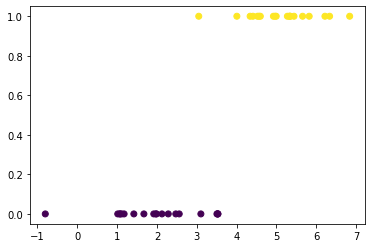

In [6]:
plt.scatter(X,y,c=y)

## Gaussian NB

In [7]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X, y)


GaussianNB(priors=None, var_smoothing=1e-09)

In [8]:
gnb.predict_proba(X.reshape(-1,1))

array([[9.98579671e-01, 1.42032949e-03],
       [9.99962586e-01, 3.74143939e-05],
       [6.26927823e-01, 3.73072177e-01],
       [9.99982606e-01, 1.73935520e-05],
       [9.99626696e-01, 3.73304355e-04],
       [9.99977515e-01, 2.24845901e-05],
       [9.94768619e-01, 5.23138081e-03],
       [9.98881988e-01, 1.11801177e-03],
       [9.97306381e-01, 2.69361910e-03],
       [9.99971975e-01, 2.80254161e-05],
       [9.99881966e-01, 1.18033983e-04],
       [9.98511931e-01, 1.48806894e-03],
       [6.19401219e-01, 3.80598781e-01],
       [9.99999999e-01, 1.03090786e-09],
       [6.39686741e-01, 3.60313259e-01],
       [8.83429608e-01, 1.16570392e-01],
       [6.22111405e-01, 3.77888595e-01],
       [9.88690971e-01, 1.13090290e-02],
       [9.99977022e-01, 2.29775504e-05],
       [9.84075563e-01, 1.59244367e-02],
       [3.30581325e-04, 9.99669419e-01],
       [1.03186619e-03, 9.98968134e-01],
       [7.18778622e-03, 9.92812214e-01],
       [8.64061851e-02, 9.13593815e-01],
       [5.677983

In [9]:
X_test = np.linspace(-1, 8, 300).reshape(-1,1)


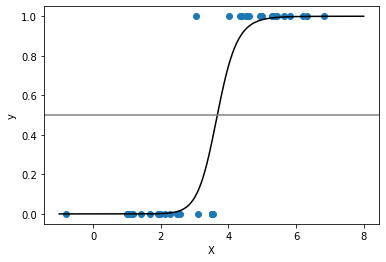

In [10]:

plt.scatter(X,y)

plt.plot(X_test, gnb.predict_proba(X_test.reshape(-1,1))[:,1],color="black")

plt.ylabel('y')
plt.xlabel('X')

plt.axhline(.5, color='.5')
plt.show()

In [11]:
gnb.theta_

array([[2.01246077],
       [5.09863848]])

In [12]:
gnb.sigma_

array([[1.1790426 ],
       [0.71668995]])

## LDA

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X, y)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=True, tol=0.0001)

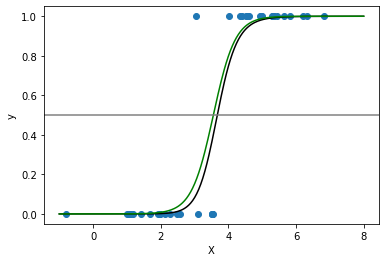

In [14]:
plt.scatter(X,y)
X_test = np.linspace(-1, 8, 300).reshape(-1,1)

plt.plot(X_test, gnb.predict_proba(X_test.reshape(-1,1))[:,1],color="black")
plt.plot(X_test, lda.predict_proba(X_test.reshape(-1,1))[:,1],color="green")

plt.ylabel('y')
plt.xlabel('X')

plt.axhline(.5, color='.5')
plt.show()

In [15]:
lda.means_

array([[2.01246077],
       [5.09863848]])

In [16]:
lda.covariance_

array([[0.94786627]])

Estimation à la main

In [17]:
stdm=(X[y==1].std(ddof=1)+X[y==0].std(ddof=1))/2

X[y==1].mean()

5.098638481844649

In [18]:
stdm

0.9913067987793829

## QDA

In [19]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X, y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True,
                              tol=0.0001)

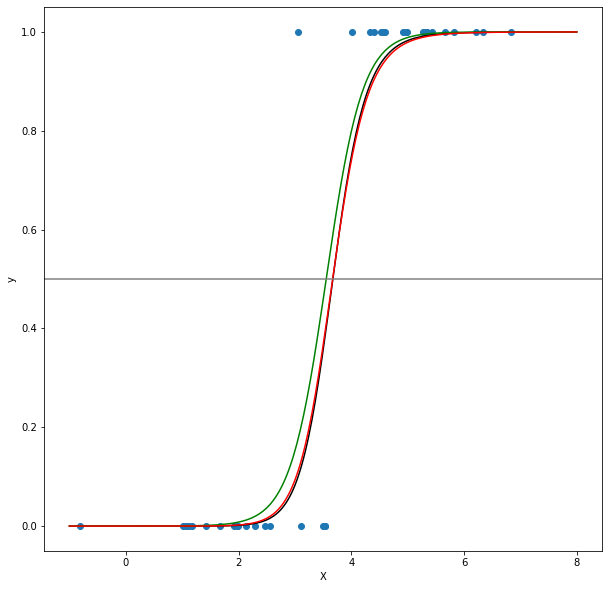

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(X,y)
X_test = np.linspace(-1, 8, 300).reshape(-1,1)

plt.plot(X_test, gnb.predict_proba(X_test.reshape(-1,1))[:,1],color="black")
plt.plot(X_test, lda.predict_proba(X_test.reshape(-1,1))[:,1],color="green")
plt.plot(X_test, qda.predict_proba(X_test.reshape(-1,1))[:,1],color="red")

plt.ylabel('y')
plt.xlabel('X')

plt.axhline(.5, color='.5')
plt.show()

In [21]:
qda.covariance_

[array([[1.24109747]]), array([[0.75441047]])]

In [22]:
gnb.sigma_

array([[1.1790426 ],
       [0.71668995]])

## Comparaison avec régression logistique

**Question** Créer un modèle de régression logistique, et superposer les deux courbes. Que constatez-vous ?

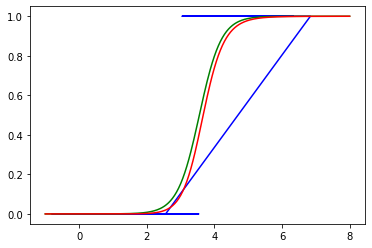

In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=120)
clf.fit(X,y)

plt.plot(X,y,color="blue")
plt.plot(X_test, lda.predict_proba(X_test.reshape(-1,1))[:,1],color="green")
plt.plot(X_test, qda.predict_proba(X_test.reshape(-1,1))[:,1],color="red")
plt.show()
#je constate que c'est conforme à la réalité

# Données non linéaires

## Données

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [30]:
n_samples=20

X=np.concatenate((np.random.normal(loc=2, scale=1.0, size=n_samples),
                  np.random.normal(loc=5.0, scale=1.0, size=n_samples),
                  np.random.normal(loc=8.0, scale=1.0, size=n_samples))).reshape(-1,1)
y=np.concatenate((np.repeat(0,n_samples),np.repeat(1,n_samples),
                  np.repeat(0,n_samples)))


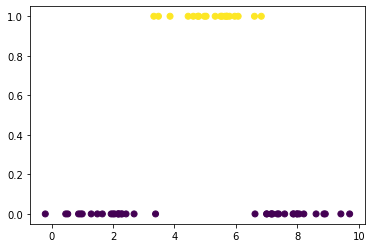

In [31]:
plt.scatter(X,y,c=y)

## LDA vs QDA

In [32]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

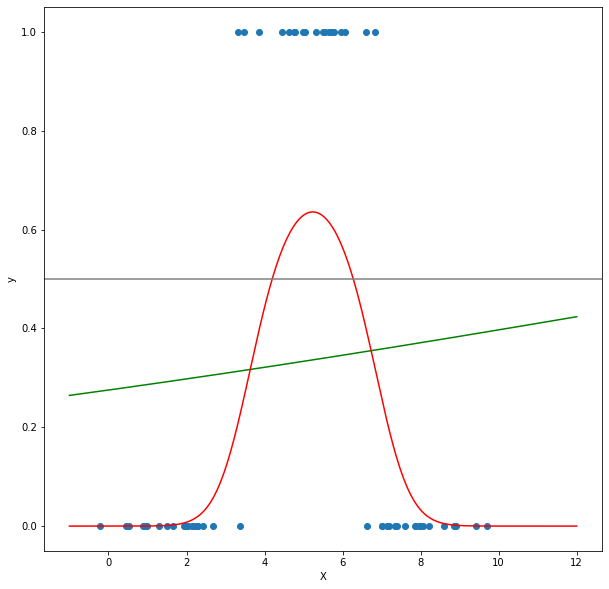

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(X,y)
X_test = np.linspace(-1, 12, 300).reshape(-1,1)

plt.plot(X_test, lda.predict_proba(X_test.reshape(-1,1))[:,1],color="green")
plt.plot(X_test, qda.predict_proba(X_test.reshape(-1,1))[:,1],color="red")

plt.ylabel('y')
plt.xlabel('X')

plt.axhline(.5, color='.5')
plt.show()

**Question** étudier les écarts-types pris par les deux algorithmes

In [37]:
stdLDA = (X[y==1].std(ddof=1)+X[y==0].std(ddof=1))/2
stdQDA_0 = X[y==0].std(ddof=1)
stdQDA_1 = X[y==1].std(ddof=1)

print("Ecart type LDA :",stdLDA)
print("Ecart type QDA Cat0 :",stdQDA_0)
print("Ecart type QDA Cat1 :",stdQDA_1)

Ecart type LDA : 2.102442470374506
Ecart type QDA Cat0 : 3.262225466079341
Ecart type QDA Cat1 : 0.9426594746696714


**Question** superposer la prédiction de `GaussianNB`.

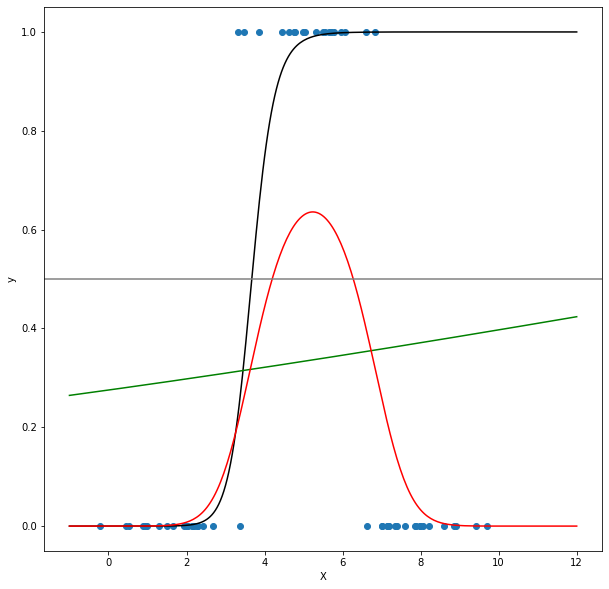

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(X,y)
X_test = np.linspace(-1, 12, 300).reshape(-1,1)

plt.plot(X_test, gnb.predict_proba(X_test.reshape(-1,1))[:,1],color="black")
plt.plot(X_test, lda.predict_proba(X_test.reshape(-1,1))[:,1],color="green")
plt.plot(X_test, qda.predict_proba(X_test.reshape(-1,1))[:,1],color="red")

plt.ylabel('y')
plt.xlabel('X')

plt.axhline(.5, color='.5')
plt.show()